In [3]:
import plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family'] = 'Times New Roman'

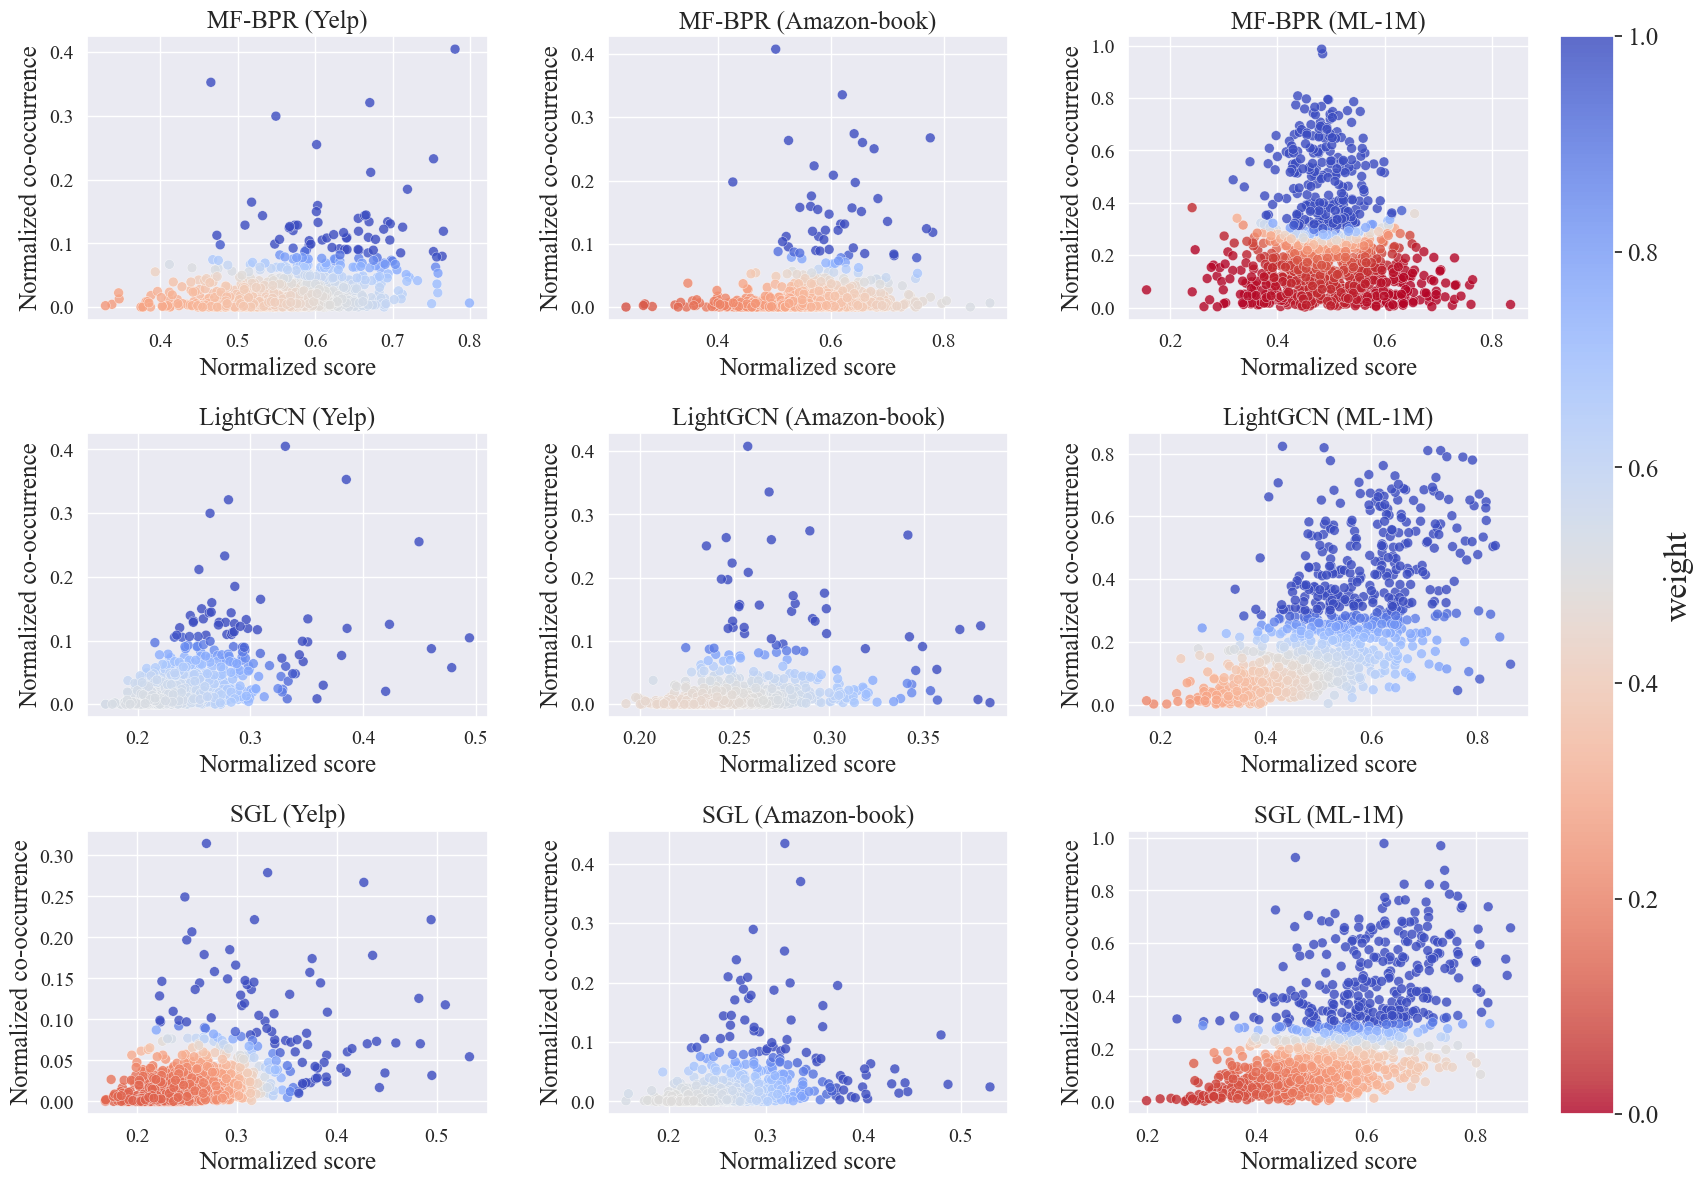

In [4]:
import matplotlib.pyplot as plt
import numpy as np

FONTSIZE = 18
TICKSIZE = 14

def weight_ddrm(pth, epoch, ax, scatter_args):
    
    np.random.seed(2023)
    
    pm = plot.PlotManager(pth)
    samples = pm.get_samples(epoch)
    
    criterions = samples['criterion']
    prob = samples['prob']

    n_samples_to_plot = 1000

    # 全サンプルからnこサンプリング
    random_indices = np.random.choice(len(criterions), n_samples_to_plot, replace=False)

    criterions = criterions[random_indices]
    prob = prob[random_indices]


    scatter = ax.scatter(
        criterions[:, 0], criterions[:, 1],
        c=prob, **scatter_args
    )
    ax.set_xlabel('Normalized score',fontsize=FONTSIZE)
    ax.set_ylabel('Normalized co-occurrence',fontsize=FONTSIZE)
    ax.tick_params(axis='x', labelsize=TICKSIZE) 
    ax.tick_params(axis='y', labelsize=TICKSIZE) 
#     ax.set_xlim((0, 1))
#     ax.set_ylim((0, 1))
    return scatter  # scatter を返すことで colorbar を作成可能にする

paths = [
    "20250102_131628yelpddrm_mf_weight", "20250102_132454bookddrm_mf_weight", "20250102_134326mlddrm_mf_weight",
    "20250104_152037yelpddrm_lgn_weight", "20250104_153723bookddrm_lgn_weight", "20250104_163420mlddrm_lgn_weight",
    "20250104_115908yelpddrm_sgl_weight", "20250104_122010bookddrm_sgl_weight", "20250104_134618mlddrm_sgl_weight"
]
epochs = [10, 10, 5, 10, 10, 30, 5, 5, 30]
labels = [
    "MF-BPR (Yelp)", "MF-BPR (Amazon-book)", "MF-BPR (ML-1M)",
    "LightGCN (Yelp)", "LightGCN (Amazon-book)", "LightGCN (ML-1M)",
    "SGL (Yelp)", "SGL (Amazon-book)", "SGL (ML-1M)"
]

# 図全体のサイズを指定
fig, axes = plt.subplots(3, 3, figsize=(20,14))
axes = axes.flatten()

# サブプロット間のスペースを調整
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# カラーマップと共有設定
cmap = "coolwarm_r"
scatter_args = {
    "vmin": 0, "vmax": 1, "cmap": cmap, "s": 50,
    "edgecolor": "white", "linewidths": 0.3, "alpha": 0.8
}

scatters = []
for i, (path, epoch, label) in enumerate(zip(paths, epochs, labels)):
    scatter = weight_ddrm(path, epoch=epoch, ax=axes[i], scatter_args=scatter_args)
    axes[i].set_title(label,fontsize=FONTSIZE)
    scatters.append(scatter)

# 図全体にカラーバーを追加
#cbar = fig.colorbar(scatters[0], ax=axes.ravel().tolist(), orientation='vertical', fraction=0.05, pad=0.02)

cbar = fig.colorbar(scatters[0], ax=axes.ravel().tolist(), orientation='vertical', fraction=0.05, pad=0.02)
cbar.set_label("weight",fontsize = FONTSIZE+6)
cbar.ax.tick_params(labelsize=TICKSIZE+4)


# 表示
#plt.savefig("weight.png", dpi=300, bbox_inches="tight")
